In [2]:
#In case you don't have qiskit, install it now
%pip install qiskit --quiet
#Installing/upgrading pylatexenc seems to have fixed my mpl issue
#If you try this and it doesn't work, try also restarting the runtime/kernel
%pip install pylatexenc --quiet

#Let's go ahead and import all this stuff too
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, Aer, execute
from qiskit.quantum_info import Statevector
import numpy as np
import random
import math
from qiskit.visualization import plot_histogram, plot_state_qsphere, plot_bloch_multivector, plot_bloch_vector

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


In [74]:
n = 4
num_clauses = 3
aux_num = num_clauses*2 + (num_clauses - 1)
variables = QuantumRegister(n, name='clauses')
auxes = QuantumRegister(aux_num, name='auxes')
U = QuantumCircuit(variables, auxes)
expression = []

for i in range(num_clauses):
    clause = []
    for j in range(3):
        to_add = random.randint(0, n - 1)
        while (to_add in clause):
            to_add = random.randint(0, n - 1)
        clause.append(to_add)
    expression.append(clause)

not_list = []
for i in range(num_clauses * 3):
    not_list.append(random.randint(0,1))

print(expression)
print(not_list)

for i in range(num_clauses):
    first = expression[i][0]
    second = expression[i][1]
    third = expression[i][2]
    first_aux = auxes[2*i]
    second_aux = auxes[2*i + 1]

    if (not not_list[i * 3]):
        U.x(first)
    if (not not_list[1 + i * 3]):
        U.x(second)
    U.x(first_aux)
    U.ccx(first, second, first_aux)
    if (not not_list[i * 3]):
        U.x(first)
    if (not not_list[1 + i * 3]):
        U.x(second)

    U.barrier()

    #or the result of the first two and the third
    U.x(first_aux)
    if (not not_list[2 + i * 3]):
        U.x(third)
    U.x(second_aux)
    U.ccx(first_aux, third, second_aux)
    U.x(first_aux)
    if (not not_list[2 + i * 3]):
        U.x(third)
    U.barrier()
    
if (num_clauses > 1):
    U.ccx(auxes[1], auxes[3], auxes[num_clauses*2])
    for i in range(2, num_clauses):
        U.ccx(auxes[i*2 + 1], auxes[num_clauses*2 + (i - 2)], auxes[num_clauses*2 + (i - 1)])


[[2, 0, 1], [0, 1, 3], [0, 2, 1]]
[0, 1, 1, 1, 0, 1, 0, 0, 0]


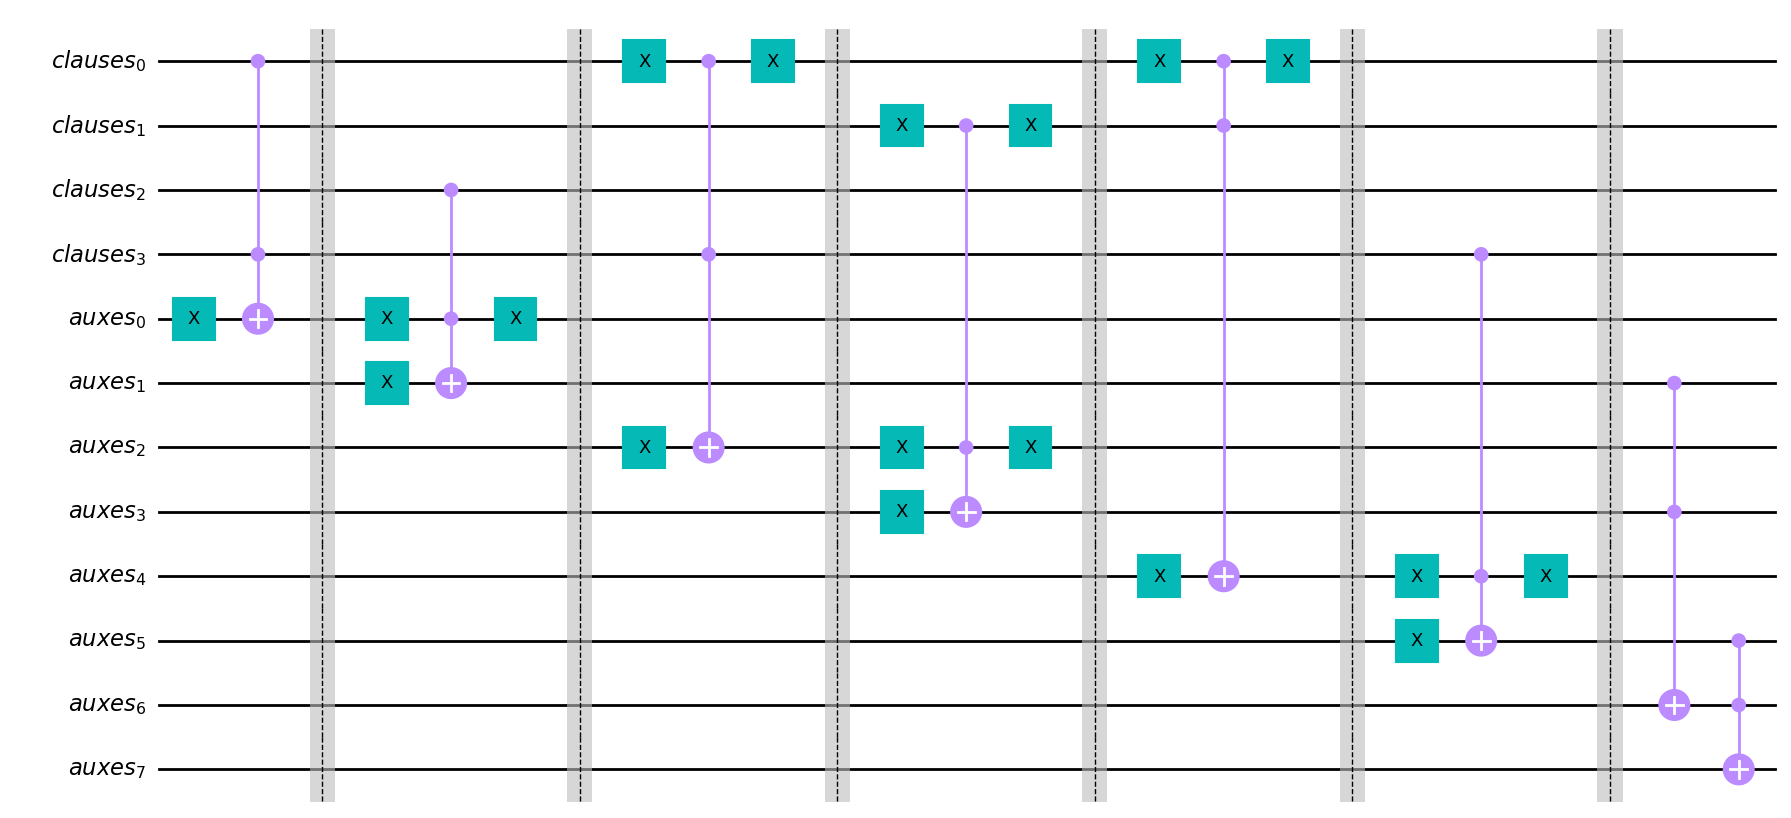

In [45]:
U.draw('mpl', filename='graph.png')


In [75]:
solutions = 0
for i in range(2 ** n):
    vals = []
    for j in range(n):
        vals.append((i >> j) & 1)

    result = 1
    for j in range(num_clauses):
        first = vals[expression[j][0]] ^ not_list[j*3]
        second = vals[expression[j][1]] ^ not_list[j*3 + 1]
        third = vals[expression[j][2]] ^ not_list[j*3 + 2]
        result &= (first | second | third)
    if result:
        solutions += 1
        print(vals)
print(f'num_solutions is {solutions}')
print(not_list)
print(expression)

[1, 0, 0, 0]
[0, 1, 0, 0]
[0, 0, 1, 0]
[1, 0, 1, 0]
[0, 1, 1, 0]
[1, 1, 1, 0]
[0, 1, 0, 1]
[0, 0, 1, 1]
[0, 1, 1, 1]
[1, 1, 1, 1]
num_solutions is 10
[0, 1, 1, 1, 0, 1, 0, 0, 0]
[[2, 0, 1], [0, 1, 3], [0, 2, 1]]
